<a href="https://colab.research.google.com/github/khizerzakir/ERASMUS-CDE/blob/main/kmean_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries

In [1]:
from copy import deepcopy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
!pip install rasterio
import rasterio as rio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 57.4 MB/s eta 0:00:00


Drag the image **S2image.tif** in the **sample_data** folder

In [2]:
filepath='http://photos.tc.free.fr/Enseignement/gaed_S2_crop.tif'
src=rio.open(filepath)
im=src.read()

Be careful with the shape

In [3]:
im.shape
nb_bands,size_x,size_y=im.shape
print('size of the image',im.shape)

size of the image (12, 500, 500)


Put data between 0 and 1


Visualize and save bands


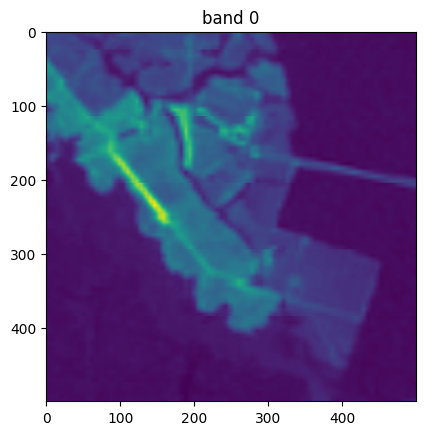

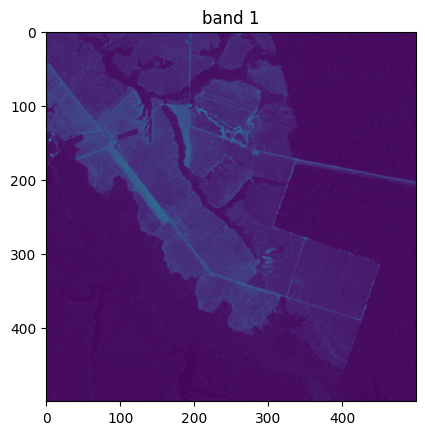

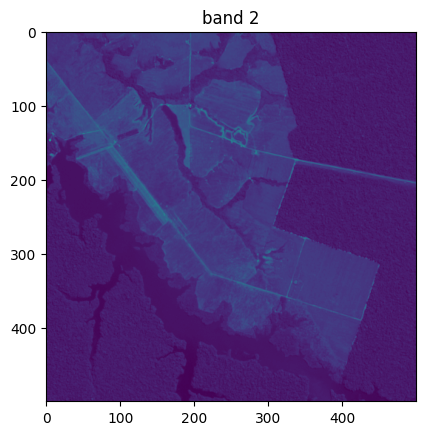

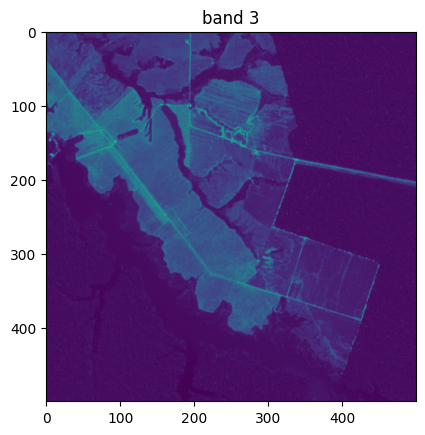

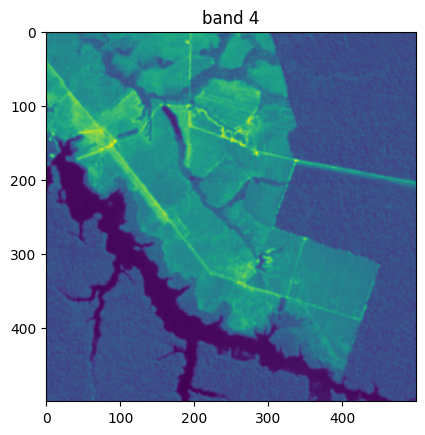

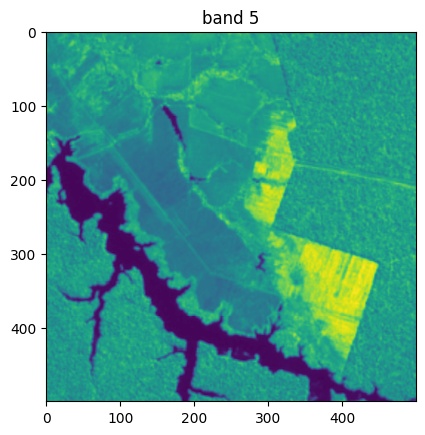

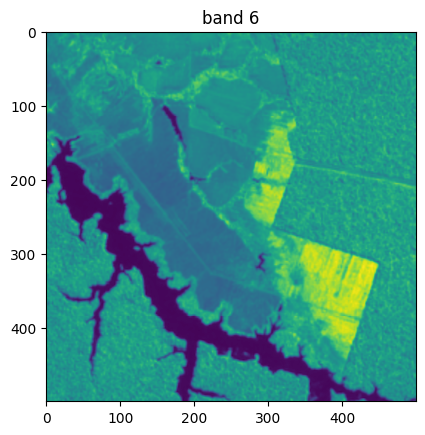

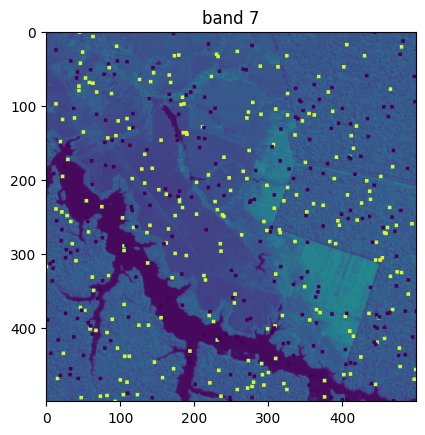

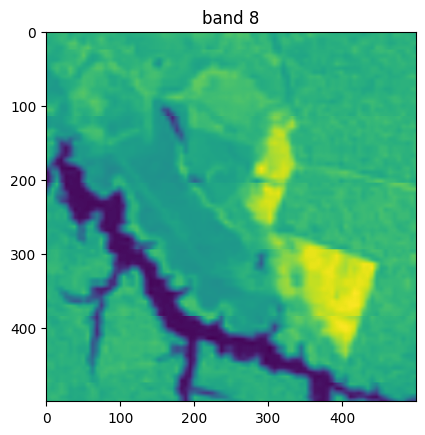

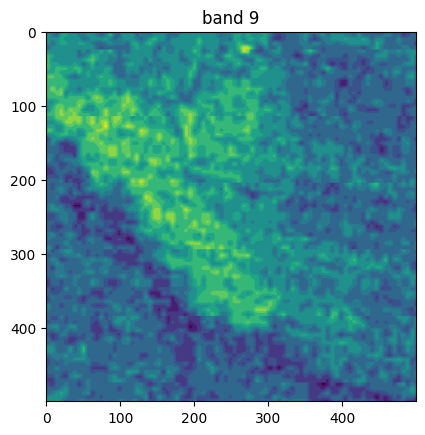

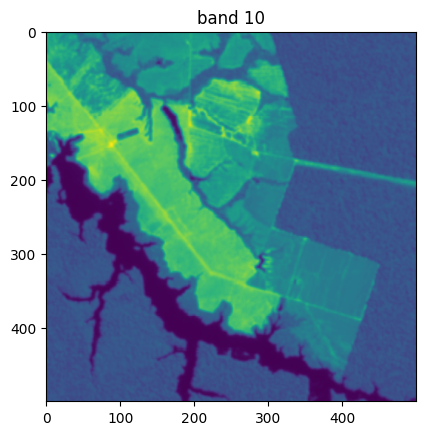

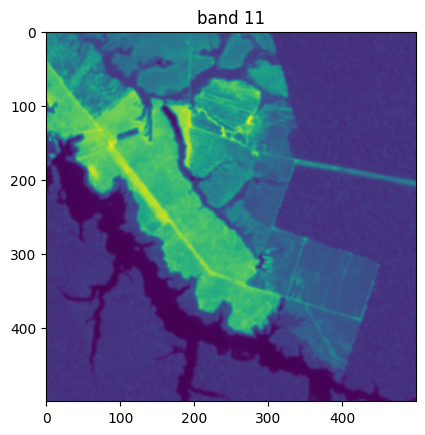

In [4]:
for i in range(nb_bands):
    im_tmpo=im[i,:,:]
    im[i,:,:]=(im_tmpo-np.min(im_tmpo))/(np.max(im_tmpo)-np.min(im_tmpo))
    plt.figure()
    plt.imshow(im[i,:,:])
    plt.title('band %d'%i)
    plt.savefig('band_%.2d.png'%i)


Create a data matrix -> reshape data such as

Data is of dimensions (size_x x size_y , nb_bands)


In [5]:
data=np.zeros((size_x*size_y,nb_bands))
for i in range(nb_bands):
    data[:,i]=im[i,:,:].reshape(1,size_x*size_y)


Verify that data are correct

In [6]:
for i in range(nb_bands):
    print('band %.2d : min - max = [%.4f,%.4f]'%(i,np.min(data[:,i]),np.max(data[:,i])))


band 00 : min - max = [0.0000,1.0000]
band 01 : min - max = [0.0000,1.0000]
band 02 : min - max = [0.0000,1.0000]
band 03 : min - max = [0.0000,1.0000]
band 04 : min - max = [0.0000,1.0000]
band 05 : min - max = [0.0000,1.0000]
band 06 : min - max = [0.0000,1.0000]
band 07 : min - max = [0.0000,1.0000]
band 08 : min - max = [0.0000,1.0000]
band 09 : min - max = [0.0000,1.0000]
band 10 : min - max = [0.0000,1.0000]
band 11 : min - max = [0.0000,1.0000]


copy / paste your previous kmeans function

In [7]:
def kmeans(data,k=3,name_output=None,iter_max=100):
    # Number of points
    n = data.shape[0]
    # Number of features
    c = data.shape[1]

    # Generate random centers inside the dataset
    mean = np.mean(data, axis = 0)
    std = np.std(data, axis = 0)
    centers = np.random.randn(k,c)*std + mean

    # Plot the data and the centers generated as random
    # Plot the data and the centers generated as random
    if name_output is not None:
        plt.clf()
        plt.scatter(data[:,0], data[:,1], s=7)
        plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)
        plt.title('initial centers')
        plt.savefig('%s_initial_centers.png'%name_output)

    # Internal variables
    centers_old = np.zeros(centers.shape) # to store old centers
    centers_new = deepcopy(centers) # Store new centers
    error = np.linalg.norm(centers_new - centers_old)
    iter = 0

    # clusters : array of size n with corresponding clusters
    clusters = np.zeros(n)
    # distances : nx4 matrix with distances to each center
    distances = np.zeros((n,k))

    # When, after an update, the estimate of that center stays the same, exit loop
    while error != 0 or iter==iter_max:
        # Measure the distance to every center (see np.linalg.norm)
        for i in range(k):
            distances[:,i] = np.linalg.norm(data - centers_new[i], axis=1)
        # Assign all training data to closest center (see np.argmin)
        clusters = np.argmin(distances, axis = 1)
        # save old centers
        centers_old = deepcopy(centers_new)
        # Calculate mean for every cluster and update the center
        for i in range(k):
            centers_new[i] = np.mean(data[clusters == i], axis=0)
        # compute and print error
        error = np.linalg.norm(centers_new - centers_old)
        print('iteration %d : error %.5f'%(iter,error))
        if np.isnan(error):
            print('nan : reset centers')
            centers_old = np.zeros(centers.shape)
            centers_new = np.random.randn(k,c)*std + mean

        iter+=1
    print('convergence after %d iterations'%iter)
    # plot
    if name_output is not None:
        plt.clf()
        plt.scatter(data[:,0], data[:,1], s=7)
        for i in range(k):
            plt.scatter(data[clusters==i,0], data[clusters==i,1], s=7+i*10)
        plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)
        plt.title('clustering')
        plt.savefig('%s_result_with_%d_clusters.png'%(name_output,k))
    return clusters


Perform k-means

In [8]:
clusters = kmeans(data,k=7)

iteration 0 : error 1.52575
iteration 1 : error 0.44278
iteration 2 : error 0.45667
iteration 3 : error 0.22971
iteration 4 : error 0.19452
iteration 5 : error 0.26263
iteration 6 : error 0.08382
iteration 7 : error 0.04283
iteration 8 : error 0.02819
iteration 9 : error 0.01953
iteration 10 : error 0.01448
iteration 11 : error 0.01084
iteration 12 : error 0.00844
iteration 13 : error 0.00675
iteration 14 : error 0.00450
iteration 15 : error 0.00330
iteration 16 : error 0.00264
iteration 17 : error 0.00227
iteration 18 : error 0.00126
iteration 19 : error 0.00099
iteration 20 : error 0.00078
iteration 21 : error 0.00069
iteration 22 : error 0.00070
iteration 23 : error 0.00078
iteration 24 : error 0.00050
iteration 25 : error 0.00040
iteration 26 : error 0.00016
iteration 27 : error 0.00020
iteration 28 : error 0.00026
iteration 29 : error 0.00020
iteration 30 : error 0.00006
iteration 31 : error 0.00000
convergence after 32 iterations


Rescale clustering

In [9]:
im_clusters=clusters.reshape((size_x,size_y))

Plot the clustering

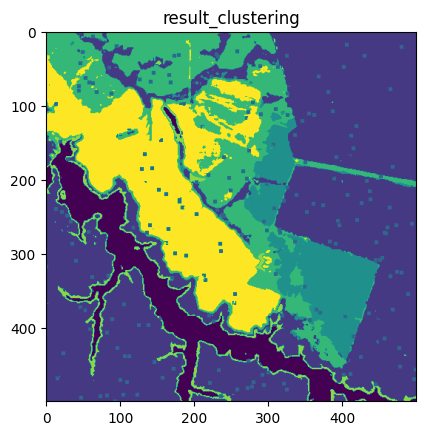

In [10]:
plt.clf()
plt.imshow(im_clusters)
plt.title('result_clustering')
plt.savefig('clustering_sentinel.png')

In [11]:
np.unique(im_clusters)

array([0, 1, 2, 3, 4, 5, 6])

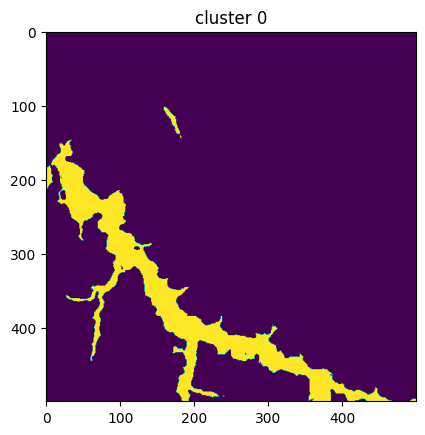

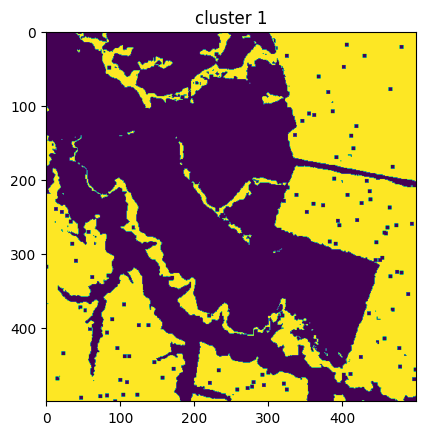

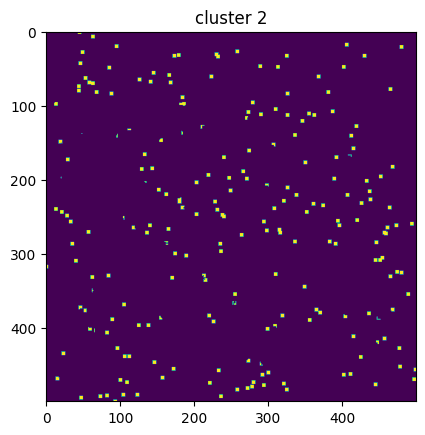

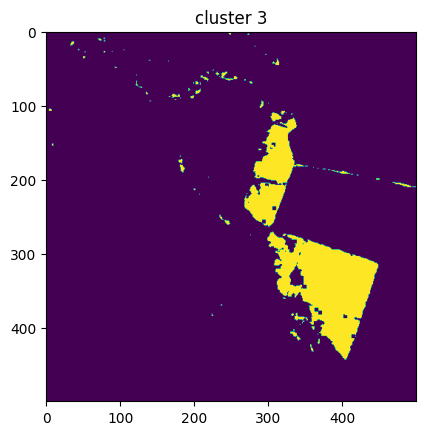

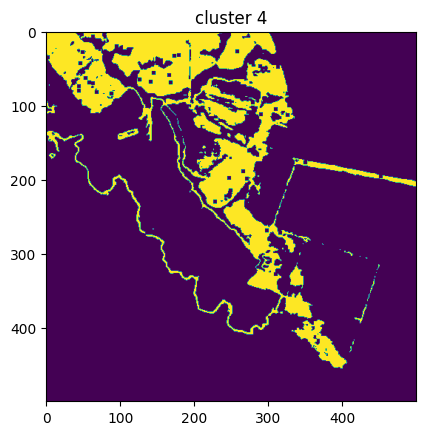

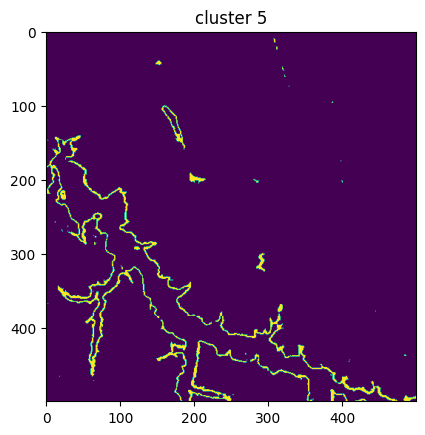

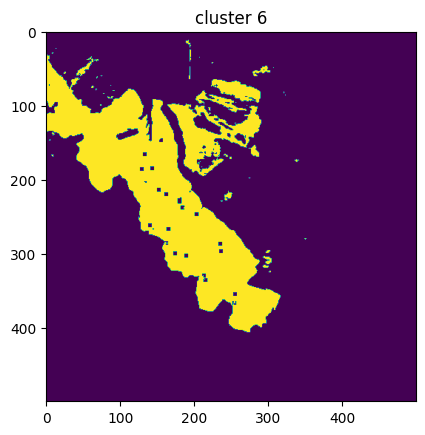

In [17]:
for i in range(len(np.unique(im_clusters))):
  plt.figure()
  plt.imshow(im_clusters==i)
  plt.title('cluster %d'%i)